In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.altimetry
reload(asp_plot.altimetry)

from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
try:
    atl06 = gpd.read_file(os.path.join(icesat_directory, "atl06_all.gpkg"))
    atl06_clean = gpd.read_file(os.path.join(icesat_directory, "atl06_cleaned.gpkg"))
    atl06.index = atl06["time"]
    atl06_clean.index = atl06_clean["time"]
    del atl06["time"], atl06_clean["time"]

    icesat = Altimetry(
        dem_fn=dem_fn, 
        geojson_fn=geojson_fn,
        aligned_dem_fn=aligned_dem_fn,
        atl06=atl06,
        atl06_clean=atl06_clean
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, geojson_fn=geojson_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
if icesat.atl06 is None:
    icesat.pull_atl06_data(
        esa_worldcover=True,
        save_to_gpkg=True,
        filename_to_save=os.path.join(icesat_directory, "atl06_all")
    )

icesat.atl06

,rgt,rms_misfit,region,h_mean,cycle,gt,h_sigma,dh_fit_dx,segment_id,pflags,n_fit_photons,spot,w_surface_window_final,y_atc,x_atc,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags,geometry
time,,,,,,,,,,,,,,,,,,,,
2018-10-19 01:22:42.849,312,0.057618,3,0.712761,1,10,0.033456,0.004047,396539,0,5,6,112.929657,2075.261719,7947945.5,51539607552,1.309046e+12,90.0,0,POINT (-156.33771 71.24194)
2018-10-19 01:22:42.852,312,0.059513,3,0.823991,1,10,0.019844,0.009106,396540,0,10,6,112.929657,2075.311279,7947965.5,51539607552,1.309046e+12,90.0,0,POINT (-156.33778 71.24212)
2018-10-19 01:22:42.855,312,0.093339,3,0.905593,1,10,0.024544,-0.000860,396541,0,15,6,112.929657,2075.361572,7947985.5,51539607552,1.309046e+12,90.0,0,POINT (-156.33786 71.2423)
2018-10-19 01:22:42.858,312,0.091363,3,0.905599,1,10,0.021550,0.002180,396542,0,18,6,112.929657,2075.408936,7948005.5,51539607552,1.309046e+12,90.0,0,POINT (-156.33793 71.24247)
2018-10-19 01:22:42.861,312,0.104050,3,0.946535,1,10,0.024073,0.001642,396543,0,19,6,112.929657,2075.448486,7948025.5,51539607552,1.309046e+12,90.0,0,POINT (-156.338 71.24265)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.405,381,0.220518,5,8.967862,23,60,0.063659,-0.009591,605225,0,12,1,3.000000,-3294.771729,12123277.0,180388626432,1.309046e+12,90.0,0,POINT (-156.80443 71.248)
2024-04-12 14:33:11.407,381,0.149359,5,8.935914,23,60,0.041452,0.008769,605226,0,13,1,3.000000,-3294.732910,12123297.0,180388626432,1.309046e+12,30.0,0,POINT (-156.8045 71.24782)
2024-04-12 14:33:11.410,381,0.172222,5,9.029394,23,60,0.051959,0.002038,605227,0,11,1,3.000000,-3294.683838,12123317.0,180388626432,1.309046e+12,90.0,0,POINT (-156.80457 71.24765)


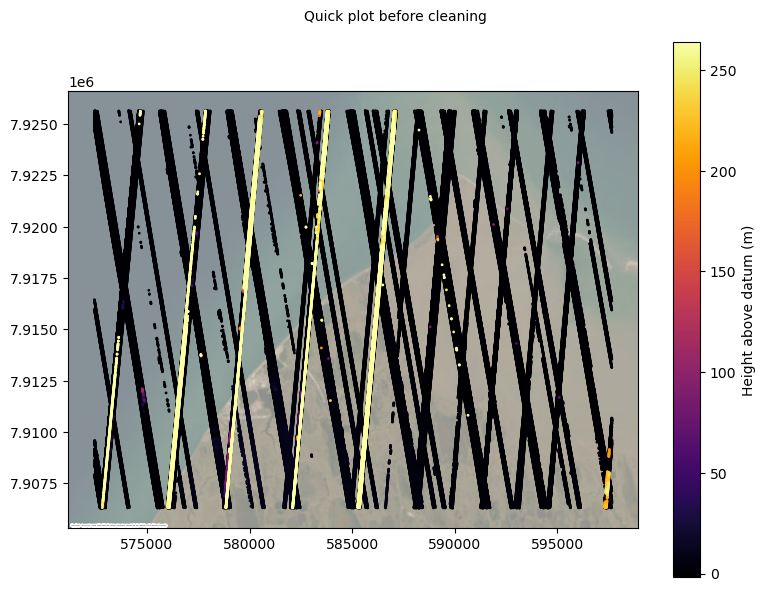

In [5]:
icesat.plot_atl06(
    title="Quick plot before cleaning",
    map_crs=map_crs,
    **ctx_kwargs
)

In [6]:
# Get only the data that is coincident with the DEM acquisition
if icesat.atl06_clean is None:
    icesat.clean_atl06(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        save_to_csv=True,
        save_to_gpkg=True,
        filename_to_save=os.path.join(icesat_directory, "atl06_cleaned"),
    )

icesat.atl06_clean

,rgt,rms_misfit,region,h_mean,cycle,gt,h_sigma,dh_fit_dx,segment_id,pflags,n_fit_photons,spot,w_surface_window_final,y_atc,x_atc,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags,geometry
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210,381,0.512081,5,0.556896,15,10,0.048773,-0.047549,604607,0,138,1,4.182611,3311.720459,12110909.0,704374636544,1.309046e+12,60.0,0,POINT (-156.57676 71.35026)
2022-04-17 01:15:56.213,381,0.452866,5,-0.066967,15,10,0.027673,-0.022097,604608,0,300,1,3.000000,3311.739014,12110929.0,704374636544,1.309046e+12,50.0,0,POINT (-156.57684 71.35008)
2022-04-17 01:15:56.467,381,0.123681,5,-0.307942,15,10,0.006363,0.009508,604698,0,379,1,3.000000,3309.855713,12112730.0,704374636544,1.309046e+12,90.0,0,POINT (-156.5835 71.33408)
2022-04-17 01:15:56.470,381,0.118864,5,-0.187099,15,10,0.006248,0.004371,604699,0,362,1,3.000000,3309.832031,12112750.0,704374636544,1.309046e+12,90.0,0,POINT (-156.58357 71.3339)
2022-04-17 01:15:56.473,381,0.112785,5,-0.125473,15,10,0.005804,0.003172,604700,0,378,1,3.000000,3309.790283,12112770.0,704374636544,1.309046e+12,90.0,0,POINT (-156.58365 71.33372)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.725,381,0.118455,5,10.326173,15,60,0.017196,-0.001089,605033,0,69,6,3.000000,-3314.025146,12119434.0,704374636544,1.309046e+12,90.0,0,POINT (-156.79129 71.28218)
2022-04-17 01:15:57.728,381,0.123033,5,10.347944,15,60,0.013848,0.003520,605034,0,84,6,3.000000,-3314.061279,12119454.0,704374636544,1.309046e+12,90.0,0,POINT (-156.79136 71.282)
2022-04-17 01:15:57.731,381,0.125393,5,10.359776,15,60,0.015876,-0.002322,605035,0,64,6,3.000000,-3314.073975,12119474.0,704374636544,1.309046e+12,90.0,0,POINT (-156.79143 71.28182)


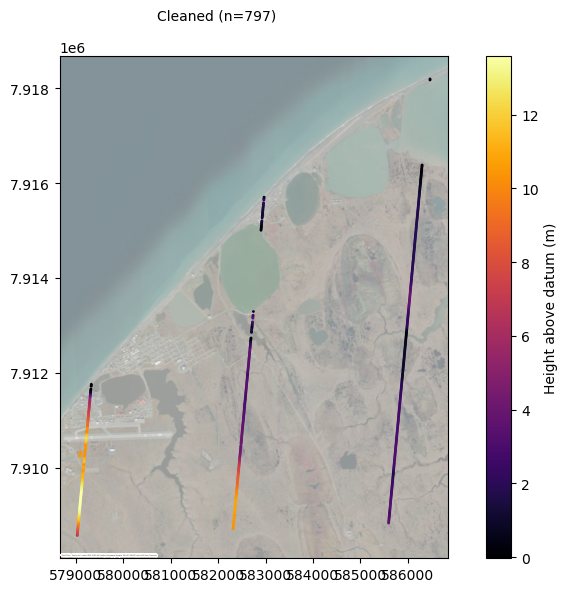

In [7]:
icesat.plot_atl06(
    title=f"Cleaned (n={icesat.atl06_clean.shape[0]})",
    clean=True,
    map_crs=map_crs,
    **ctx_kwargs
)

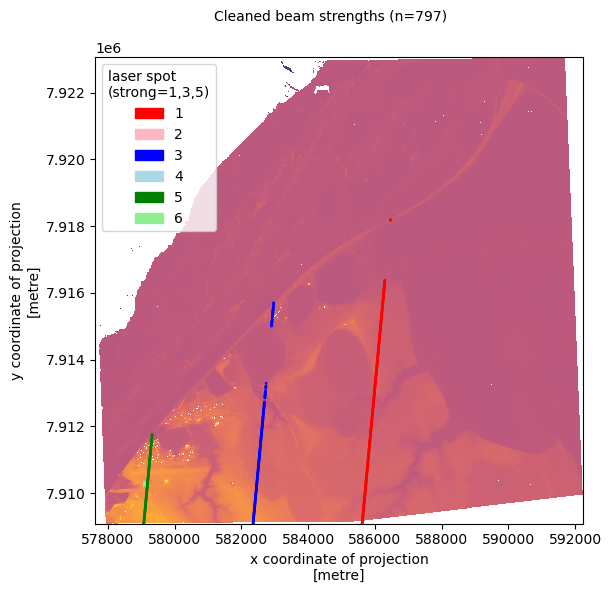

In [8]:
icesat.plot_atl06(
    title=f"Cleaned beam strengths (n={icesat.atl06_clean.shape[0]})",
    clean=True,
    plot_beams=True,
    use_dem_basemap=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



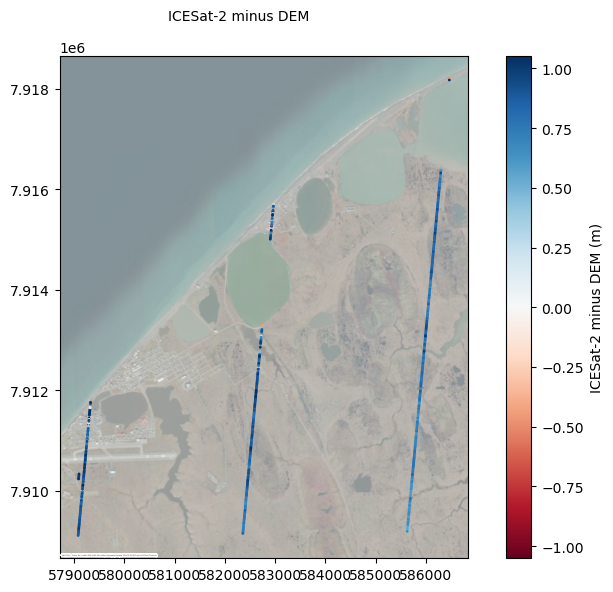

In [9]:
icesat.compare_atl06_to_dem(
    title = "ICESat-2 minus DEM",
    **ctx_kwargs
)

In [10]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06(
    atl06_csv=os.path.join(icesat_directory, "atl06_cleaned.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-DEM.tif

Please use that, or remove this file before running pc_align.



In [11]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-DEM.tif

Please use that, or remove this file before running pc_align.




Using aligned DEM for comparison.


Using aligned DEM for comparison.



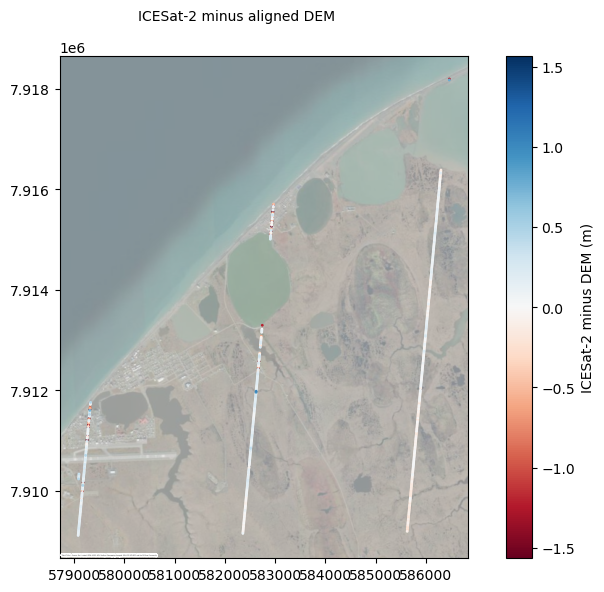

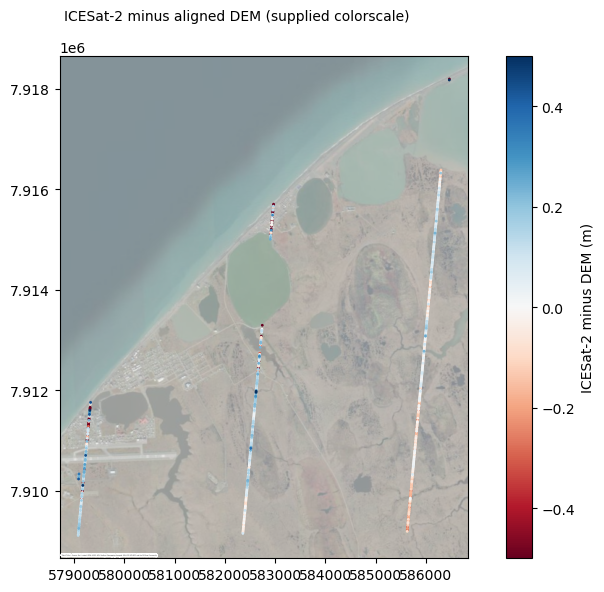

In [12]:
# Quickly compare the translated DEM to the ATL06 data
icesat.compare_atl06_to_dem(title = "ICESat-2 minus aligned DEM", use_aligned_dem=True, **ctx_kwargs)

icesat.compare_atl06_to_dem(title = "ICESat-2 minus aligned DEM (supplied colorscale)", clim=(-0.5, 0.5), use_aligned_dem=True, **ctx_kwargs)

In [13]:
# Gather a larger subset of data for validation
icesat.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_gpkg=False,
    filename_to_save=os.path.join(icesat_directory, "atl06_cleaned_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

,rgt,rms_misfit,region,h_mean,cycle,gt,h_sigma,dh_fit_dx,segment_id,pflags,n_fit_photons,spot,w_surface_window_final,y_atc,x_atc,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags,geometry
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.758,312,0.125748,3,-1.074176,3,30,0.006712,0.001113,396696,0,355,3,3.0,4860.470703,7951087.5,438086664192,1.309046e+12,80.0,0,POINT (-156.4261 71.2666)
2019-04-18 16:42:25.761,312,0.116087,3,-1.073597,3,30,0.006151,-0.000561,396697,0,357,3,3.0,4860.419922,7951107.5,438086664192,1.309046e+12,80.0,0,POINT (-156.42618 71.26678)
2019-04-18 16:42:25.764,312,0.126234,3,-0.959810,3,30,0.006533,0.011126,396698,0,374,3,3.0,4860.357910,7951127.5,438086664192,1.309046e+12,80.0,0,POINT (-156.42625 71.26696)
2019-04-18 16:42:25.767,312,0.231374,3,-0.436510,3,30,0.011716,0.041096,396699,0,390,3,3.0,4860.284668,7951147.5,438086664192,1.309046e+12,80.0,0,POINT (-156.42632 71.26713)
2019-04-18 16:42:25.769,312,0.236039,3,0.631266,3,30,0.013029,0.065633,396700,0,332,3,3.0,4860.202637,7951167.5,438086664192,1.309046e+12,90.0,0,POINT (-156.42639 71.26731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.017,381,0.062522,5,3.923541,23,20,0.025552,0.003314,605076,0,6,5,3.0,3225.771484,12120295.0,180388626432,1.309046e+12,90.0,0,POINT (-156.61347 71.26696)
2024-04-12 14:33:11.020,381,0.109368,5,4.019473,23,20,0.037691,0.012694,605077,0,15,5,3.0,3225.805908,12120315.0,180388626432,1.309046e+12,90.0,0,POINT (-156.61354 71.26678)
2024-04-12 14:33:11.023,381,0.229142,5,4.120587,23,20,0.051944,0.001141,605078,0,21,5,3.0,3225.857666,12120335.0,180388626432,1.309046e+12,90.0,0,POINT (-156.61361 71.2666)



Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



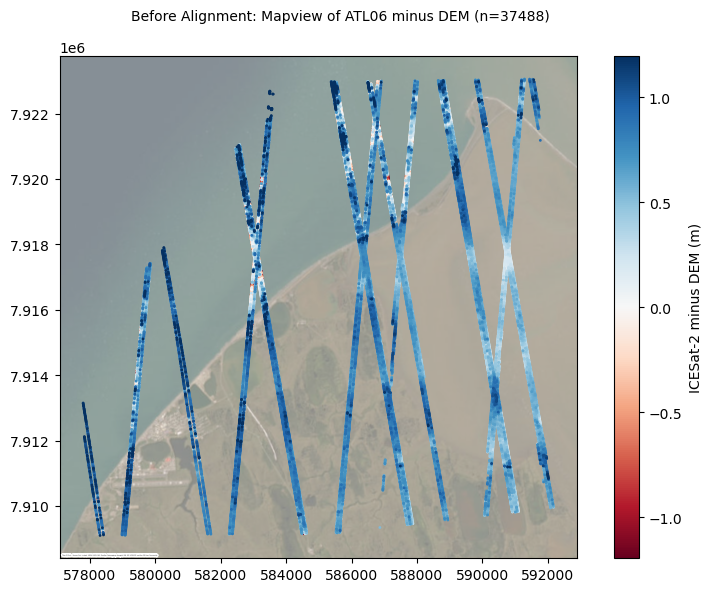

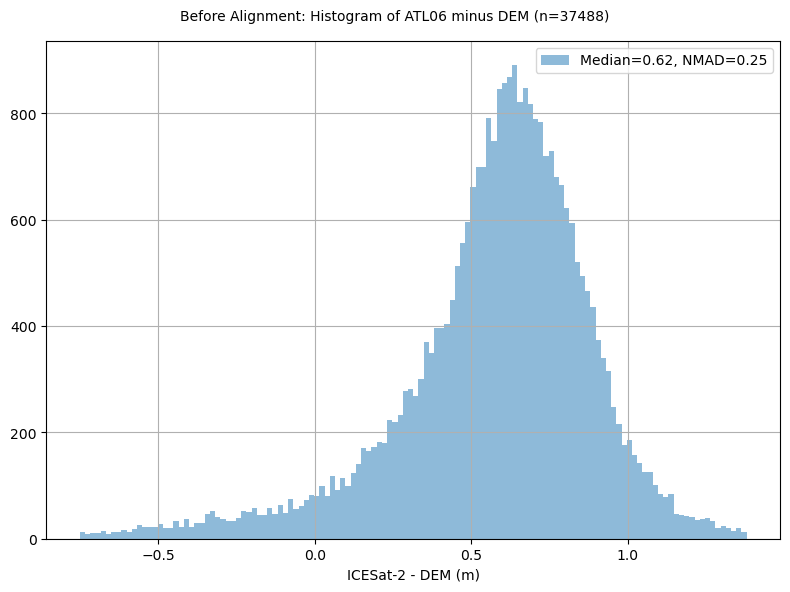

In [14]:
# Validate (before)
icesat.compare_atl06_to_dem(title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})", **ctx_kwargs)
icesat.atl06_dem_histogram(title=f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})")


Using aligned DEM for comparison.



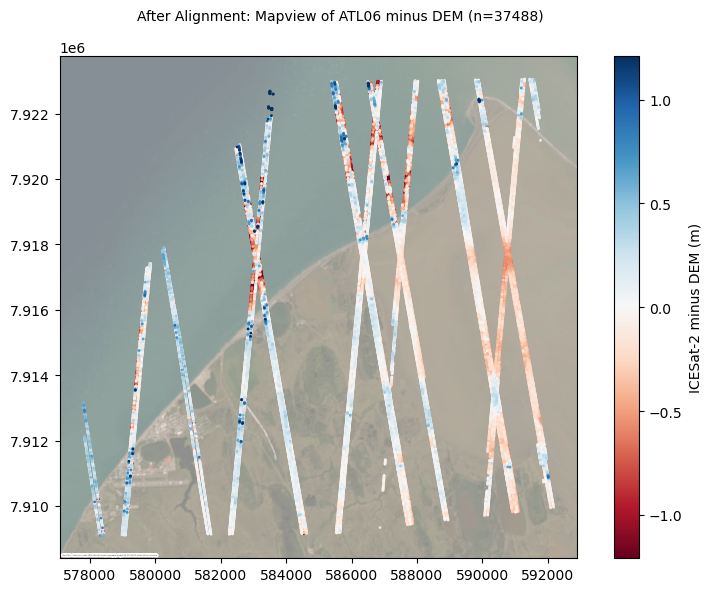

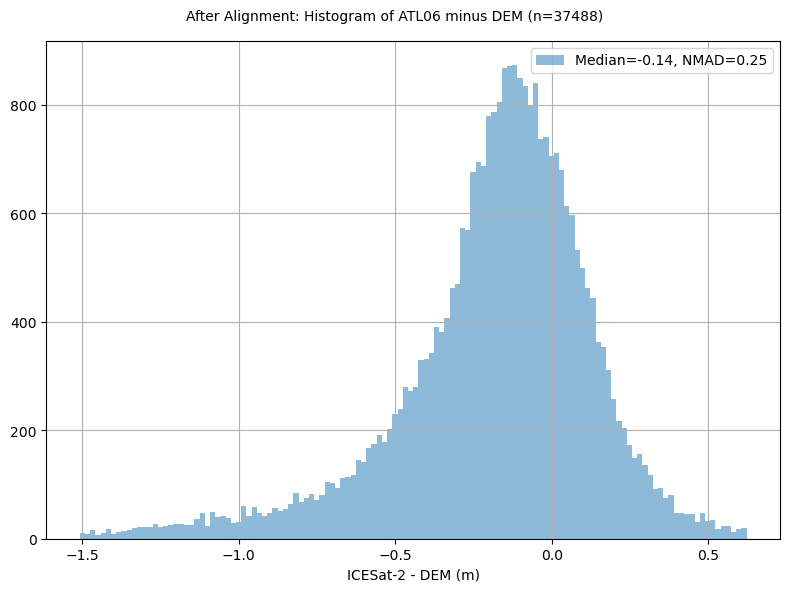

In [15]:
# Validate (after)
icesat.compare_atl06_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})", use_aligned_dem=True, **ctx_kwargs)
icesat.atl06_dem_histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})")


Using aligned DEM for comparison.



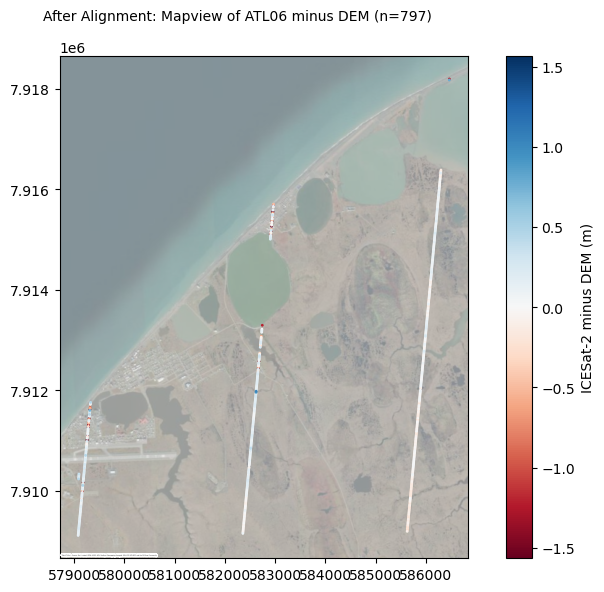

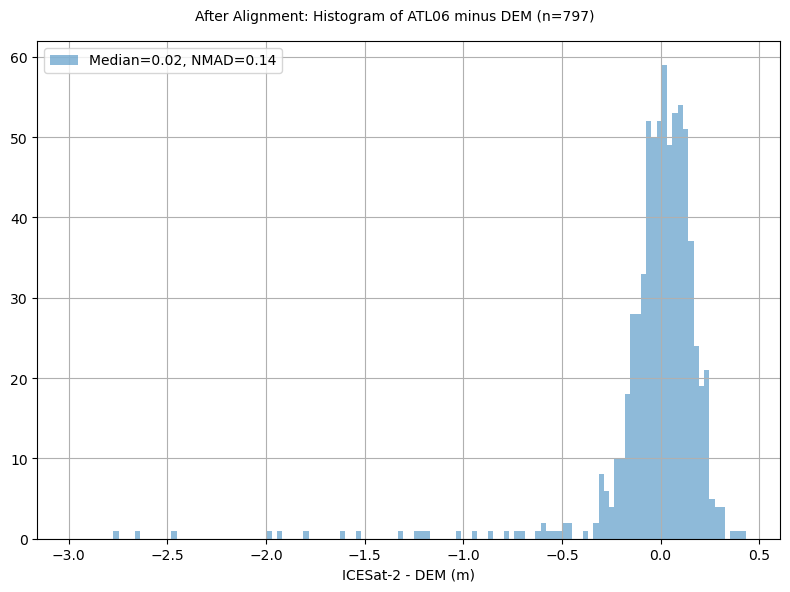

In [16]:
# Collect only the coincident cleaned data again for profile plotting
icesat.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4],
    select_years=[2022],
)

icesat.compare_atl06_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})", use_aligned_dem=True, **ctx_kwargs)

icesat.atl06_dem_histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06_clean.shape[0]})")

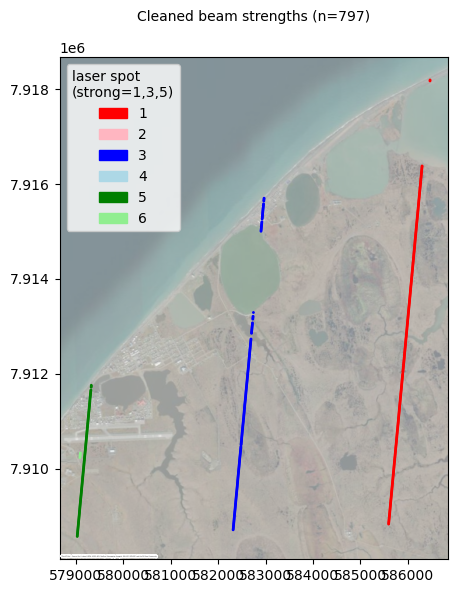

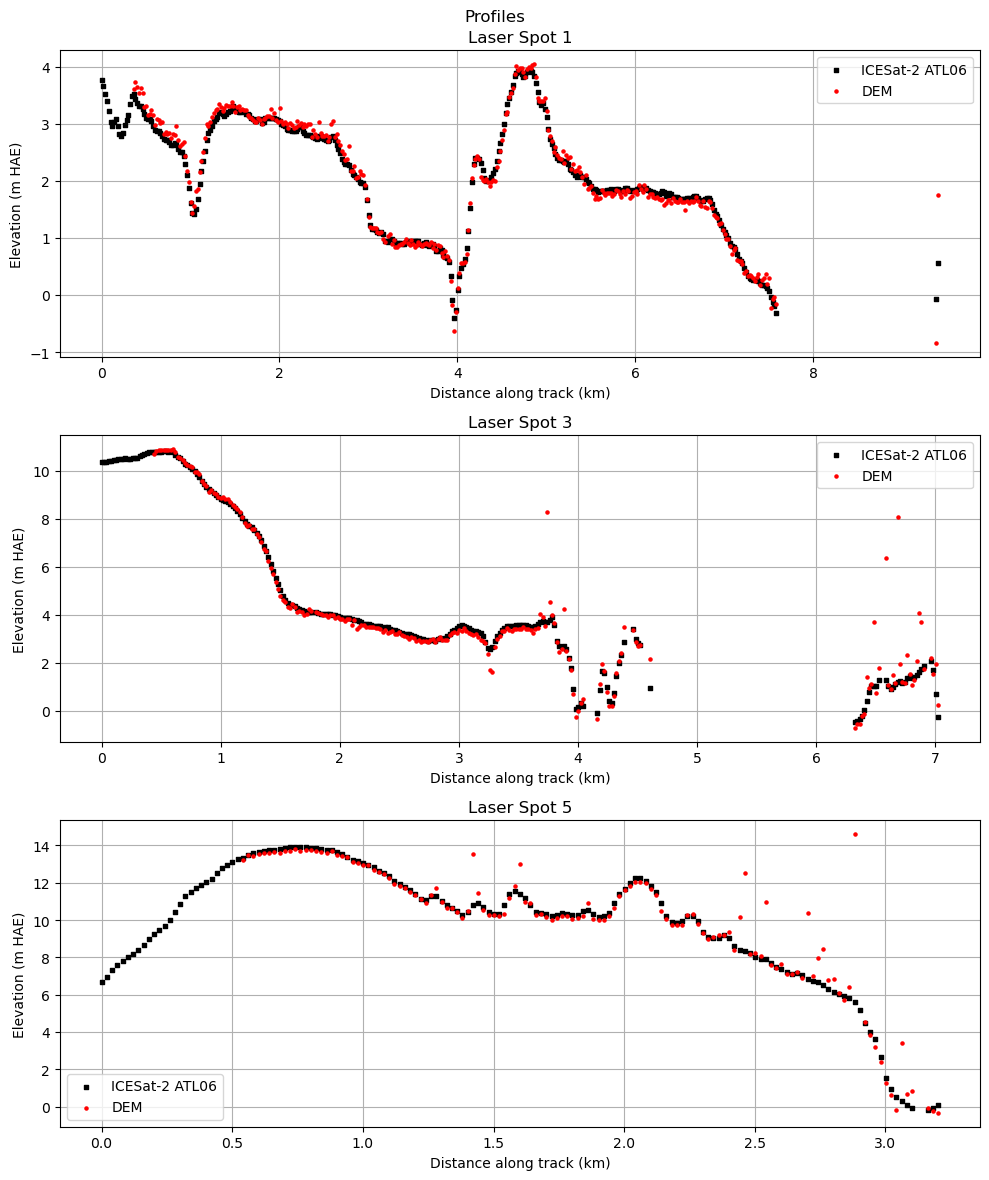

In [17]:
icesat.plot_atl06(
    title=f"Cleaned beam strengths (n={icesat.atl06_clean.shape[0]})",
    clean=True,
    plot_beams=True,
    use_dem_basemap=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06_dem_profiles(title="Profiles", only_strong_beams=True)